In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# lodaing data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

759687     75000.000000
352747     52000.000000
446442     73570.500000
465756     65000.000000
18660     240000.000000
268655     75000.000000
476002     70180.796875
665237     90000.000000
267426     75833.000000
383253    122500.000000
Name: salary_year_avg, dtype: float64

<Axes: >

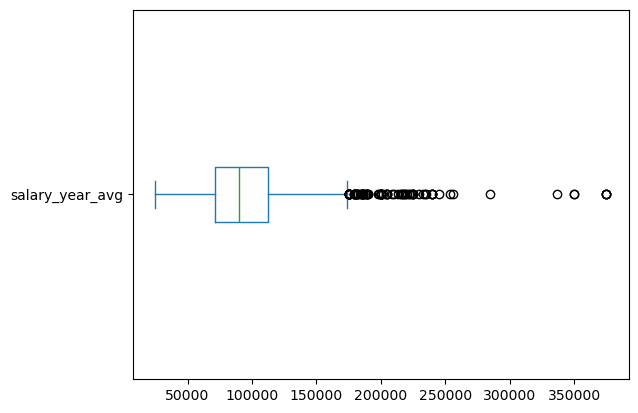

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\tanvi\AppData\Local\Temp\ipykernel_5356\1181948861.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


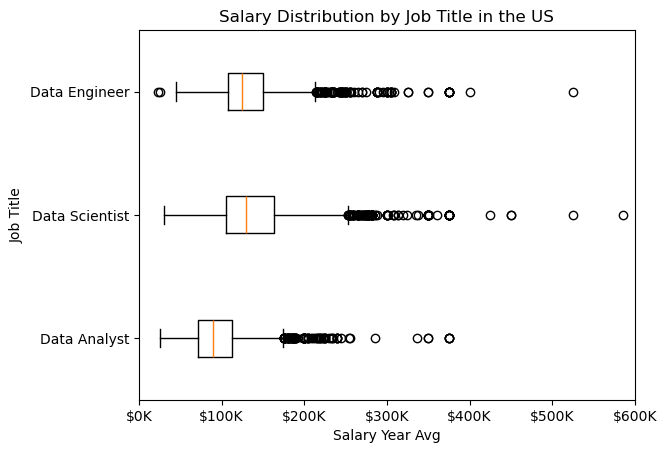

In [20]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution by Job Title in the US')
plt.xlabel('Salary Year Avg')
plt.ylabel('Job Title')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlim(0, 600000)
plt.show()